<a href="https://colab.research.google.com/github/katelyn-michelle-2023/2026/blob/main/Copy_of_cs101_data_vis_katelyn_tasnia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

csv_path = "/content/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84_2023_to_Present.csv"
df = pd.read_csv(csv_path, engine='python')
df_reduced = df.sample(frac=0.25) #makes data set under 100 mb to run in disent
df_reduced.to_csv('reduced_df.csv', index = False)

In [15]:
# 1st subset of columns to work with -> Q1 Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)

#selects 3 columns ('Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)',
#'Longitude', 'Latitude') -> removes any rows where its NAN
df_q2 = df_reduced[['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)',
            'Longitude', 'Latitude']].dropna()

#converts GHG intensity to numbers
df_q2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'] = \
    pd.to_numeric(df_q2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'],
                  errors='coerce')

df_q2 = df_q2.dropna()

df_q2



,Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²),Longitude,Latitude
3738,4.1,-73.856680,40.713340
7109,4.1,-73.971752,40.670728
1917,1.4,-73.829051,40.846079
2071,8.3,-73.960321,40.646522
1753,5.5,-73.989427,40.740418
...,...,...,...
5375,4.6,-73.739052,40.720978
1239,4.6,-73.959517,40.642272
3083,5.9,-73.998914,40.726215
1132,5.9,-73.888309,40.884391


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# nice default style
sns.set_theme(style="darkgrid")

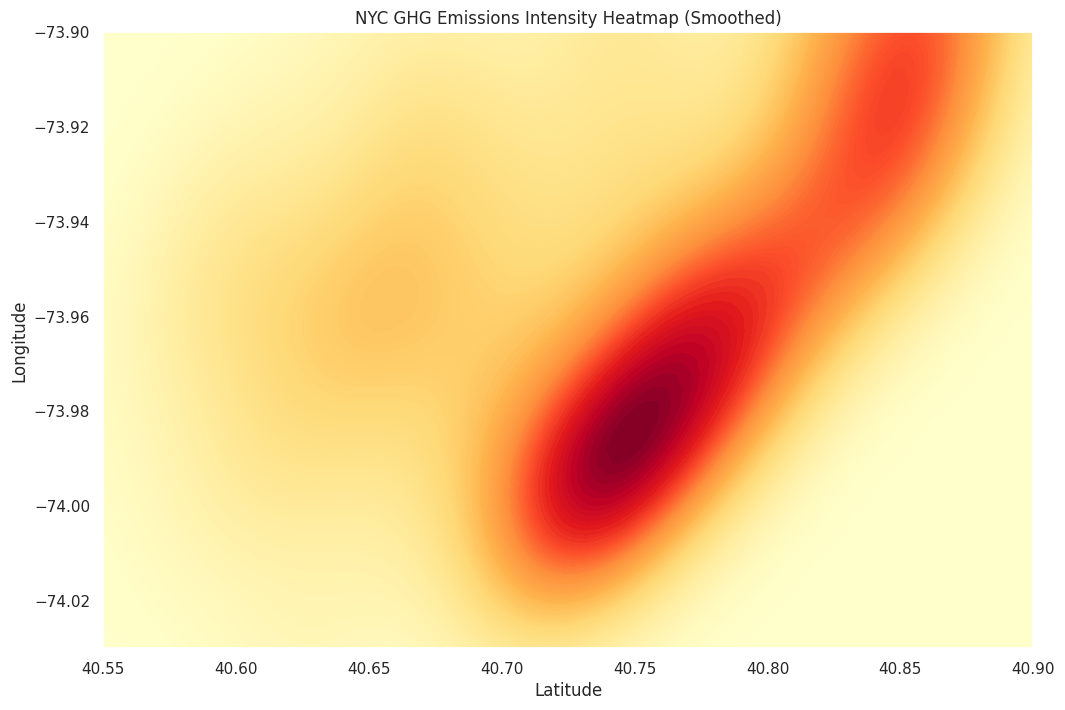

In [18]:
# positive GHG intensity
df_pos = df_q2[df_q2['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'] > 0]

plt.figure(figsize=(12,8))

sns.kdeplot(
    x=df_pos['Latitude'],
    y=df_pos['Longitude'],
    weights=df_pos['Total (Location-Based) GHG Emissions Intensity (kgCO2e/ft²)'],
    cmap="YlOrRd",
    fill=True,
    thresh=0,
    levels=100
)

plt.title("NYC GHG Emissions Intensity Heatmap (Smoothed)")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.ylim(-74.03, -73.90)
plt.xlim(40.55, 40.9)
plt.show()



In [19]:
# list all columns
print(df.columns)

# check if specific columns exist (for 2nd Q - How do ENERGY STAR Scores differ across major building types?)
columns_to_check = [
    "Primary Property Type - Self Selected",
    "Primary Property Type - Portfolio Manager-Calculated",
    "ENERGY STAR Score"
]

for col in columns_to_check:
    if col in df.columns:
        print(f"Column exists: {col}")
    else:
        print(f"Column NOT found: {col}")


Index(['Calendar Year', 'Property ID', 'Property Name', 'Parent Property ID',
       'Parent Property Name', 'Year Ending',
       'NYC Borough, Block and Lot (BBL)',
       'NYC Building Identification Number (BIN)', 'Address 1', 'City',
       ...
       'Aggregate Meter(s)-District Steam – Number of Individual Meters Included',
       'Report Generation Date', 'Report Submission Date', 'Borough',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object', length=265)
Column exists: Primary Property Type - Self Selected
Column exists: Primary Property Type - Portfolio Manager-Calculated
Column exists: ENERGY STAR Score


In [20]:
#cleans ENERGY STAR Score & Primary Property Type


df_energy = df_reduced[['Primary Property Type - Portfolio Manager-Calculated', 'ENERGY STAR Score']].dropna()
df_energy['ENERGY STAR Score'] = pd.to_numeric(df_energy['ENERGY STAR Score'], errors='coerce')
df_energy = df_energy.dropna()
print(df_energy['Primary Property Type - Portfolio Manager-Calculated'].nunique())
print(df_energy['Primary Property Type - Portfolio Manager-Calculated'].value_counts())
print(df_energy['Primary Property Type - Portfolio Manager-Calculated'].value_counts().get("Vehicle Dealership", 0))


df_energy

17
Primary Property Type - Portfolio Manager-Calculated
Multifamily Housing                      1204
Office                                    135
Hotel                                      47
K-12 School                                25
Non-Refrigerated Warehouse                 19
Retail Store                               18
Worship Facility                           17
Distribution Center                        12
Senior Living Community                    10
Medical Office                              6
Refrigerated Warehouse                      5
Residence Hall/Dormitory                    4
Supermarket/Grocery Store                   3
Hospital (General Medical & Surgical)       2
Financial Office                            2
Mixed Use Property                          2
Bank Branch                                 1
Name: count, dtype: int64
0


,Primary Property Type - Portfolio Manager-Calculated,ENERGY STAR Score
3738,Multifamily Housing,84.0
7109,Multifamily Housing,89.0
1917,Multifamily Housing,100.0
2071,Multifamily Housing,39.0
1753,Office,51.0
...,...,...
1333,Multifamily Housing,93.0
5375,Multifamily Housing,39.0
1239,Multifamily Housing,65.0
1132,Senior Living Community,68.0


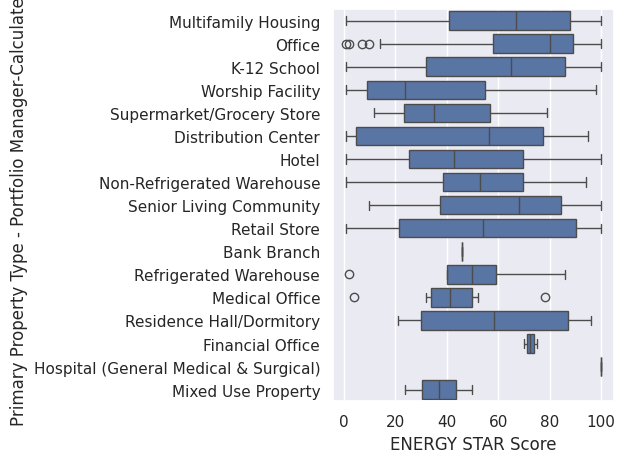

In [21]:
#boxplot
sns.boxplot(
    x="ENERGY STAR Score",
    y="Primary Property Type - Portfolio Manager-Calculated",
    data=df_energy
)
plt.tight_layout()
plt.show()

In [26]:
#Q3 Year-to-year trends → how did energy use change over time?

df_year_compare = df_reduced[['Calendar Year', 'Site EUI (kBtu/ft²)', 'Property GFA - Self-Reported (ft²)']].copy()

#cleans calendar year
df_year_compare['Calendar Year'] = pd.to_numeric(df_year_compare['Calendar Year'], errors='coerce')
df_year_compare = df_year_compare[df_year_compare['Calendar Year'].between(2011,2025)]

#adds values to Site EUI where it's Not Available -> uses median num
df_year_compare['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce') # changes Not Available to NAN
median_eui = df['Site EUI (kBtu/ft²)'].median()
df_year_compare['Site EUI (kBtu/ft²)'] = df['Site EUI (kBtu/ft²)'].fillna(median_eui)  #fills NAN with calculated median
df_year_compare['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce').round().astype('int64') #turns site eui to all integers
df_year_compare = df_year_compare.sort_values('Calendar Year') # sorts by year

df_year_compare = df_year_compare.dropna()
df_year_compare
print(df_year_compare.dtypes)




Calendar Year                          int64
Site EUI (kBtu/ft²)                    int64
Property GFA - Self-Reported (ft²)    object
dtype: object


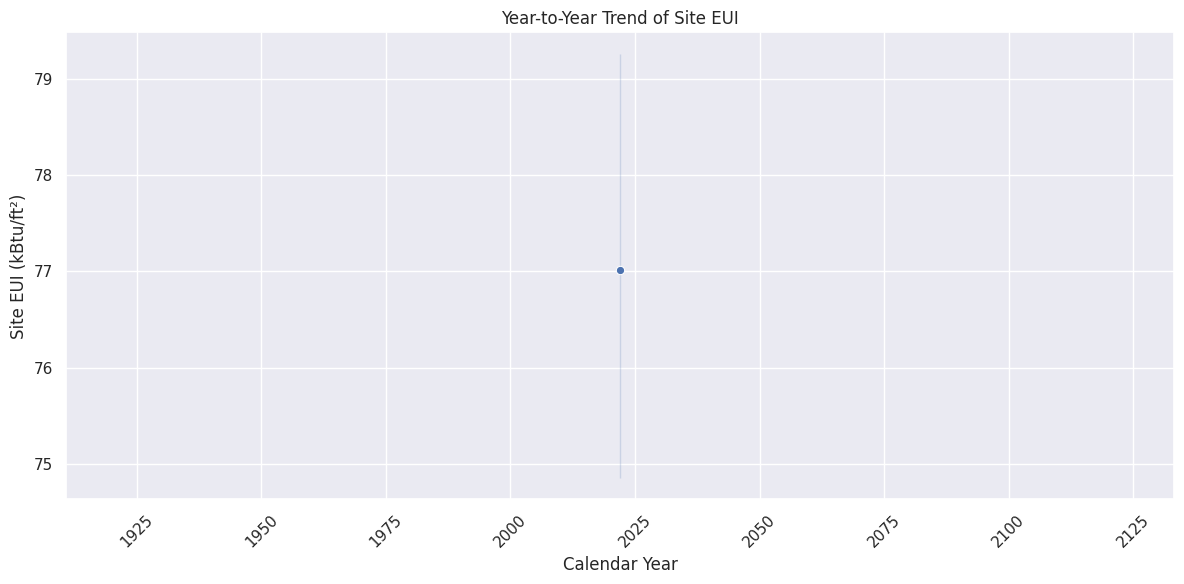

In [27]:
#reducing to under 100mb significantly affected the graph

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_year_compare,
    x="Calendar Year",
    y="Site EUI (kBtu/ft²)",
    marker="o"
)

plt.title("Year-to-Year Trend of Site EUI")
plt.xlabel("Calendar Year")
plt.ylabel("Site EUI (kBtu/ft²)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
